<H1> Assignment 1 </H1>


Question 1

Unit norm ball: Recall the definition of a unit norm ball from class that we defined in a normed linear space $(X, \|.\|): \mathcal{B} = \{x \in X : \|x\| \le 1\}$. Assume $X = \mathbf{R}^2$.

(a) Write a function that accepts p and plots the $\|.||_p$ unit norm ball. Test with integer p $\ge$ 1 as well as 0 $<$ p $<$ 1. 

(b) We claimed that for integer p $\ge$ 1 the unit norm ball is convex. Is this clear from the unit norm ball plots? What happens when 0 $<$ p $<$ 1? Print your observations. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def unit_norm_ball_plotter(p_list, convex_test = False):
    """
    Plots unit norm ball of order p
    p_list -> list of p values to plot in 2D space
    convex_test -> Checks for the convexity using line joining two random points in the unit norm ball i.e., (0,1) and (1,0) => x1 + x2 = 1
    L_p norm: ||x||_p = (|x_1|^p + |x_2|^p)^(1/p)
    L_p norm = 1 => |x_1|^p + |x_2|^p = 1 => L_p unit norm ball: |x_1|^p + |x_2|^p <= 1
    =>|x_2| <= (1 - |x_1|^p)^(1/p) => -(1 - |x_1|^p)^(1/p) <= x2 <= (1 - |x_1|^p)^(1/p) 
    *|x_1|^p <= 1 => |x_1| <= 1 => -1 <= x_1 <= 1
    """
    num_plots = len(p_list)
    plt.figure(figsize=(4*num_plots,4))
    for i, p in enumerate(p_list):
        plt.subplot(1, num_plots, i+1)
        x = np.linspace(-1, 1, 1000)
        y = (1 - np.abs(x)**p)**(1/p)
        plt.plot(x, y, color = 'k')
        plt.fill(x, y, color = 'r', alpha = 0.2)
        plt.plot(x, -y, color = 'k')
        plt.fill(x, -y, color = 'r', alpha = 0.2) 
        if(convex_test):
            x1 = np.array([0, 1])
            x2 = np.array([1, 0])
            plt.plot(x1, x2, color = 'k', linestyle = '--')
        plt.title(f"{p}-norm unit ball")
        plt.grid()
        plt.axis('equal')
    plt.show()

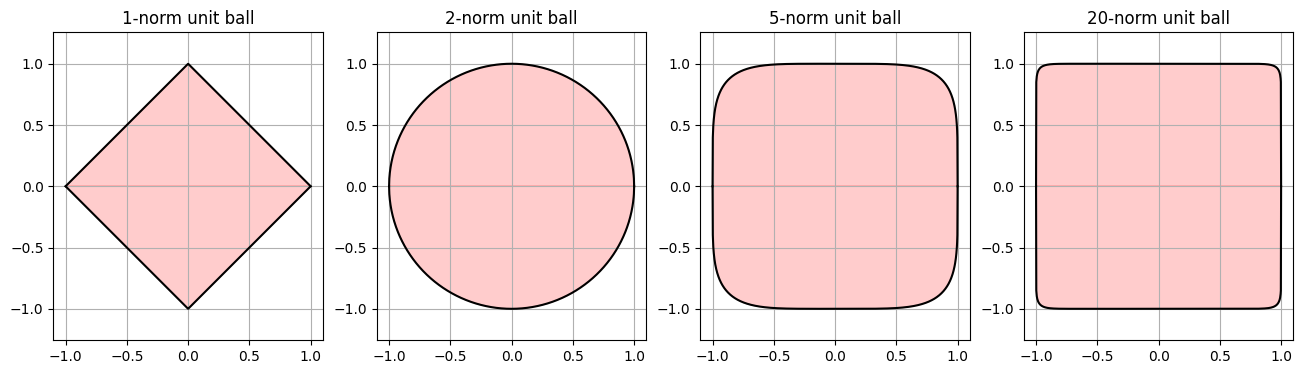

In [5]:
#Testing with p>=1
p_list = [1, 2, 5, 20]
unit_norm_ball_plotter(p_list)

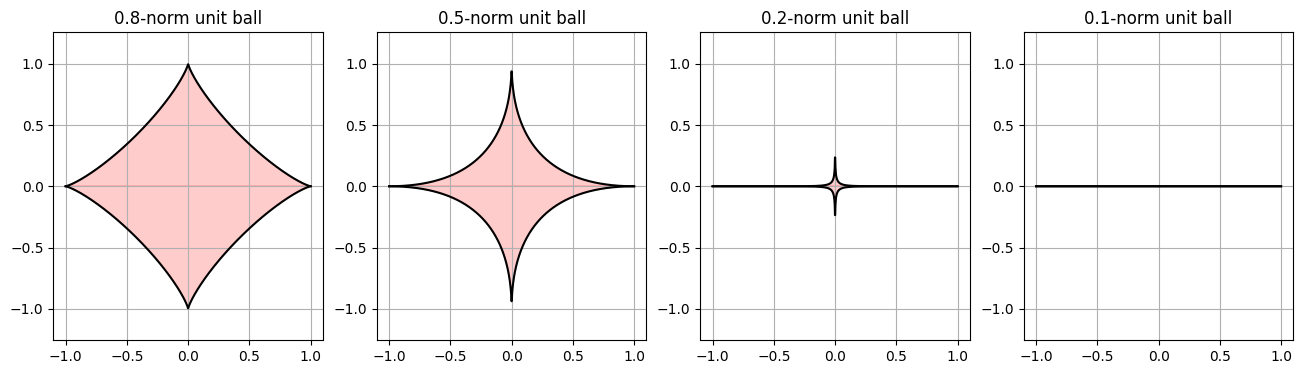

In [6]:
#Testing with p<1
p_list = [0.8, 0.5, 0.2, 0.1]
unit_norm_ball_plotter(p_list)

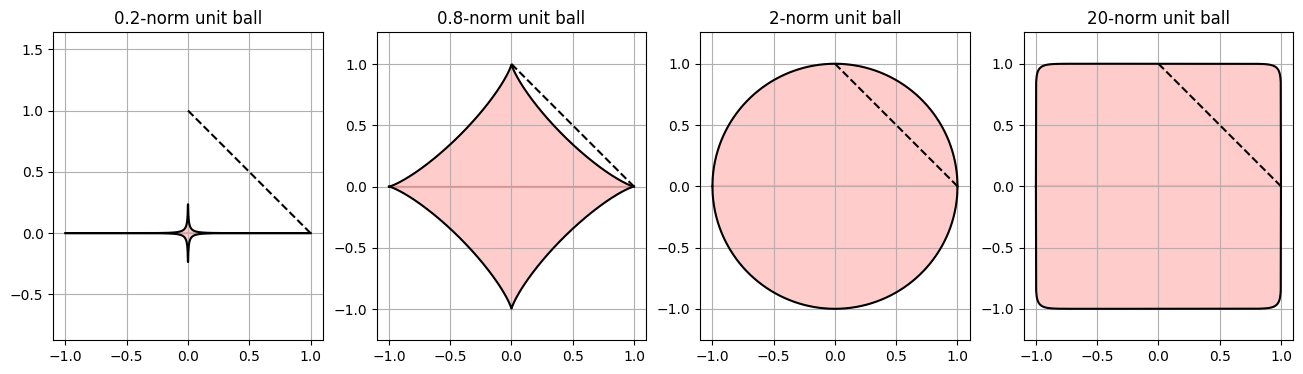

In [7]:
p_list = [0.2, 0.8, 2, 20]
unit_norm_ball_plotter(p_list, convex_test = True)

For $p\ge 1$, it is clear that the unit norm balls are convex. A simple method to confirm the same would be to consider any two random points in (or on) the unit norm ball, connect them, and check if the whole line segment belongs to the unit ball. 

Now take a look at the plots of $p<1$. 
Consider the points chosen to be $\left(1,0\right)$ and $\left(0,1\right)$. Both of these points belong to the unit norm ball. If these two points are connected via a line segment (Eqn: $x+y = 1$), every point on the line segment ignoring the end points does NOT belong to the unit norm ball. This shows that for $p<1$, the unit norm ball is NOT Convex.

Question 2

Completeness: Recall from class that a metric space $\left(\mathcal{X}, d\right)$ is said to be complete if all Cauchy sequences in $\mathcal{X}$ converge to a point in $\mathcal{X}$. Show with a numerical example that the space of continuous functions defined on the closed interval $\left[0, 1\right]$ and denoted $\mathcal{C}\left[0, 1\right]$ is incomplete with respect to the metric derived from the $L_{1}$ norm (i.e., $d(f,g) = \|f-g\|_1  = \int_{0}^{1} |f(x)-g(x)|dx \text{ for any} f, g \in \mathcal{C}\left[0, 1\right]$). Code your example and demonstrate the result either using a plot or numerically. 

Consider the N-Sigmoid function as the Cauchy Sequence. 
\begin{equation*}
f_N = {1\over{1+e^{-Nx}}} \text{ where } x \in \left[0,1\right]
\end{equation*}

\begin{equation*}
\lim_{n\rightarrow \infty} f_N(x) = \lim_{n\rightarrow \infty} {1\over{1+e^{-Nx}}} = 
\begin{cases}
1 & x>0 \\
0.5 & x=0
\end{cases}
\end{equation*}

Let $f$ be the piece-wise function obtained. $f \notin \mathcal{C}\left[0, 1\right]$ as $f$ is not continuous at $x = 0$. Hence, $\mathcal{C}\left[0, 1\right]$ is not complete (with respect to $L_1$ norm).

The same can be seen through the code below.

In [68]:
def N_Sigmoid(x, N):
    """
    N-Sigmoid function: f(x) = 1/(1 + exp(-Nx))
    """
    return 1/(1 + np.exp(-N*x))

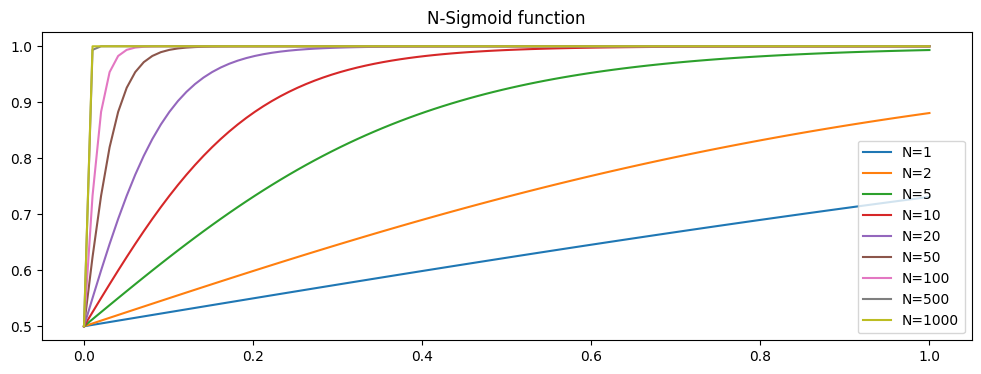

In [71]:
x = np.linspace(0, 1, 100)

plt.figure(figsize=(12,4))
plt.plot(x, N_Sigmoid(x, 1), label = 'N=1')
plt.plot(x, N_Sigmoid(x, 2), label = 'N=2')
plt.plot(x, N_Sigmoid(x, 5), label = 'N=5')
plt.plot(x, N_Sigmoid(x, 10), label = 'N=10')  
plt.plot(x, N_Sigmoid(x, 20), label = 'N=20')
plt.plot(x, N_Sigmoid(x, 50), label = 'N=50')
plt.plot(x, N_Sigmoid(x, 100), label = 'N=100')
plt.plot(x, N_Sigmoid(x, 500), label = 'N=500')
plt.plot(x, N_Sigmoid(x, 1000), label = 'N=1000')
plt.title('N-Sigmoid function')
plt.legend()
plt.show()

Question 3

Entropy of a discrete RV: Recall the definition of entropy of a discrete RV $X$ from class, $H(X) = -\sum_{x \in \mathcal{X}} p(x) \log p(x)$, where $p(x)$ is the probability mass function of $X$, and $\mathcal{X}$ is the set of possible values that the random variable $X$ can take.

(a) Write a function that accepts a PMF as input and outputs the entropy in bits. Do check for the
condition of a value being assigned zero probability. 

(b) Now use the above function to plot the entropy of $X ∼ \text{Bern}(p)$ as a function of p. Where does
this plot attain its maximum? 

In [8]:
def entropy(pmf):
    """
    Computes the entropy of a discrete random variable with probability mass function pmf
    H(X) = -sum(p(x)log(p(x)))
    """
    if(np.sum(pmf) - 1 > 1e-6):  #Floating point error
        raise ValueError("The sum of the probabilities must be equal to 1")
    
    entropy = 0
    for p in pmf:
        if p > 0:
            entropy -= p * np.log2(p)
    return entropy

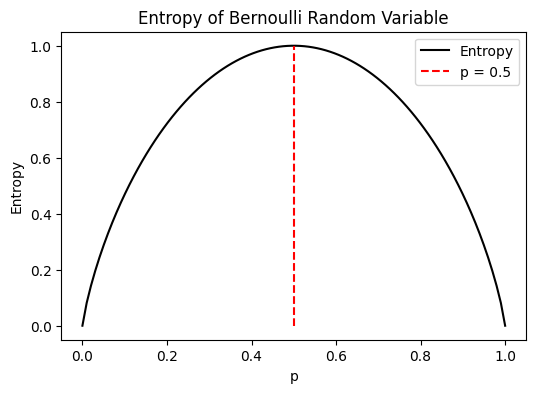

In [9]:
"""
Bernoulli Random Variable: X ~ Bernoulli(p) where 0 <= p <= 1 and p is the probability of success
H(X) = -sum(p(x)log(p(x))) = -p*log(p) - (1-p)*log(1-p)
"""
H = []
p_range = np.linspace(0, 1, 100)
for p in p_range:
    pmf = np.array([p, 1-p])
    H.append(entropy(pmf))
plt.figure(figsize=(6,4))
plt.plot(p_range, H, color = 'k', label = 'Entropy')
plt.title("Entropy of Bernoulli Random Variable")
plt.vlines(0.5, 0, 1, color = 'r', linestyle = '--', label = 'p = 0.5')
plt.ylabel("Entropy")
plt.xlabel("p")
plt.legend()
plt.show()

From the plot of the Entropy of Bernoulli Random Variable, one can see that it is symmetric which is intuitive considering Bernoulli takes only 2 values. This means that $(p, 1-p)$ is identical to $(1-p, p)$. From the plot, it is also clear that the maximum is obtained when $p = 0.5$. The same can be proved mathematically. The plot confirms that the entropy of a Bernoulli Random Variable is concave. This means that the derivative of the function (if derivative exists) when equated to 0, gives the maximum of the function.

\begin{align*}
H(X) &= -\sum_{x \in \mathcal{X}} p(x)\log p(x) \\
&= -p\log p - (1-p)\log (1-p) \\
\end{align*}

\begin{align*}
{d H(X)\over dp} &= -1 - \log p + 1 + \log (1-p) \\
&= \log {1-p\over p} \\
{d H(X)\over dp} &= 0 \implies p = 0.5
\end{align*}

Question 4

The joint entropy of a pair of discrete random variables $X$ and $Y$ with joint distribution $p(x, y)$ is defined as $H(X,Y) = −E_{(x,y)∼p(x,y)}\log p(X,Y)$ and the conditional entropy is defined as $H(Y|X) = −E_{(x,y)∼p(x,y)}\log p(Y|X)$. Show that: $H(X,Y) = H(X) + H(Y|X)$. 

\begin{align*}
H(X,Y) &= -\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y)\log p(x,y) \\
&= -\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y)\log p(x) p(y|x) \\
&= -\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y)\log p(x) - \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y)\log p(y|x) \\ 
&= -\sum_{x \in \mathcal{X}} \log p(x) \sum_{y \in \mathcal{Y}} p(x,y)  + H(Y|X)\\
&= -\sum_{x \in \mathcal{X}} \log p(x) p(x)  + H(Y|X) \\
&= -\sum_{x \in \mathcal{X}} p(x)\log p(x)  + H(Y|X)\\
&= H(X) + H(Y|X)
\end{align*}

Using a similar approach as above, one can prove that $H(X, Y) = H(Y) + H(X|Y)$.

Flow: $p(x,y) = p(y)p(x|y)$ and expand.

Question 5

The mutual information between two random variables $X$ and $Y$ is defined as $I(X;Y) = E_{(x,y)∼p(x,y)} log {p(X,Y)\over{p(x)p(y)}}$. Show that $I(X;Y) = H(X) − H(X|Y) = H(Y) − H(Y|X)$. 

\begin{align*}
I(X;Y) &= \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y)\log {p(x,y)\over{p(x)p(y)}} \\
&= \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y)\log {p(x)p(y|x)\over{p(x)p(y)}} \\
&= \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y)\log {p(y|x)\over{p(y)}} \\
&= \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y)\log p(y|x) - \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y)\log p(y)\\
&= -H(Y|X) - \sum_{y \in \mathcal{Y}} \log p(y) \sum_{x \in \mathcal{X}} p(x,y) \\
&= -H(Y|X) - \sum_{y \in \mathcal{Y}} \log p(y) p(y) \\
&= -H(Y|X) - \sum_{y \in \mathcal{Y}} p(y) \log p(y) \\
&= -H(Y|X) + H(Y) \\
&= H(Y) - H(Y|X) \\
\end{align*}

Additionally, 
\begin{align*}
H(X, Y) = H(X) + H(Y|X) = H(Y) + H(X|Y) \\
\end{align*}

\begin{align*}
\implies H(Y) = H(X, Y) - H(X|Y) \text{ and } H(Y|X) = H(X, Y) - H(X) \\
\end{align*}

\begin{align*}
&I(X;Y) = H(Y) - H(Y|X) \\
\implies &I(X;Y) = H(X, Y) - H(X|Y) - (H(X, Y) - H(X)) \\
\implies &I(X;Y) = H(X) - H(X|Y) \\
\end{align*}

Question 6

Numerical exercise: If $p(x = 0, y = 0) = p(x = 0, y = 1) = p(x = 1, y = 1) = 1/3, p(x = 1, y = 0) = 0$ where $X$,$Y$ are random variables taking values 0 or 1, find:

(a) $H(X)$, $H(Y)$

(b) $H(X|Y)$, $H(Y|X)$

(c) $H(X,Y)$

(d) $H(Y) − H(Y|X)$ 

(e) $I(X;Y)$ 

\begin{align*}
\mathcal{X}= {0,1}, \mathcal{Y} = {0,1} \\
\end{align*}

\begin{align*}
p(X=0) = \sum_{y  \in \mathcal{Y}} p(X=0, Y=y) = {1\over 3} + {1\over 3} = {2\over 3} \\
p(X=1) = \sum_{y  \in \mathcal{Y}} p(X=1, Y=y) = 0 + {1\over 3} = {1\over 3} \\
\end{align*}

\begin{align*}
\implies p(X) = \{{2\over 3}, {1\over 3}\} \\
\end{align*}

\begin{align*}
p(Y=0) = \sum_{x  \in \mathcal{X}} p(X=x, Y=0) = {1\over 3} + 0 = {1\over 3} \\
p(Y=1) = \sum_{x  \in \mathcal{X}} p(X=x, Y=1) = {1\over 3} + {1\over 3} = {2\over 3} \\
\end{align*}

\begin{align*}
\implies p(Y) = \{{1\over 3}, {2\over 3}\} \\
\end{align*}

\begin{align*}
H(X) &= -\sum_{x \in \mathcal{X}} p(x)\log p(x) \\
&= -{2\over 3}\log {2\over 3} - {1\over 3}\log {1\over 3} \\
&= -{2\over 3}\log {2} + {2\over 3}\log {3} + {1\over 3}\log {3} \\
&= -{2\over 3} + \log 3 \\
&= \log 3 - {2\over 3} \text{ bits}
\end{align*}

\begin{align*}
H(Y) &= -\sum_{y \in \mathcal{Y}} p(y)\log p(y) \\
&= - {1\over 3}\log {1\over 3}-{2\over 3}\log {2\over 3}\\
&= {1\over 3}\log {3} -{2\over 3}\log {2} + {2\over 3}\log {3} \\
&= \log 3 -{2\over 3} \text{ bits}\\
\end{align*}

\begin{align*}
p(X=0|Y=0) = {p(X=0, Y=0)\over p(Y=0)} = {{1\over 3}\over {1 \over 3}} = 1 \\
p(X=1|Y=0) = {p(X=1, Y=0)\over p(Y=0)} = {0\over {1 \over 3}} = 0 \\
\end{align*}

\begin{align*}
\implies p(X|Y=0) = \{1,0\} \\
\end{align*}

\begin{align*}
p(X=0|Y=1) = {p(X=0, Y=1)\over p(Y=1)} = {{1\over 3}\over {2 \over 3}} = {1\over2} \\
p(X=1|Y=1) = {p(X=1, Y=1)\over p(Y=1)} = {{1\over 3}\over {2 \over 3}} = {1\over2} \\
\end{align*}

\begin{align*}
\implies p(X|Y=1) = \{{1\over 2}, {1\over 2}\} \\
\end{align*}

\begin{align*}
H(X|Y) &= -\sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} p(x, y)\log p(x|y) \\
&= -\sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} p(y)p(x|y)\log p(x|y) \\
&= -\sum_{y \in \mathcal{Y}} p(y) \sum_{x \in \mathcal{X}} p(x|y)\log p(x|y) \\
&= -{1\over 3}(1 \log {1}+{0}\log 0) - {2\over 3}({1\over 2}\log {1\over 2} + {1\over 2}\log {1\over 2})\\
&= -{1\over 3}(0) - {2\over 3}(log{1\over 2}) \text{ (0 log 0 is taken as 0)}\\ 
&= {2\over 3} \text{ bits}
\end{align*}

\begin{align*}
p(Y=0|X=0) = {p(X=0, Y=0)\over p(X=0)} = {{1\over 3}\over {2 \over 3}} = {1\over 2} \\
p(Y=1|X=0) = {p(X=0, Y=1)\over p(X=0)} = {{1\over 3}\over {2 \over 3}} = {1\over 2} \\
\end{align*}

\begin{align*}
\implies p(Y|X=0) = \{{1\over 2}, {1\over 2}\} \\
\end{align*}

\begin{align*}
p(Y=0|X=1) = {p(X=1, Y=0)\over p(X=1)} = {0\over {1 \over 3}} = 0 \\
p(Y=1|X=1) = {p(X=1, Y=1)\over p(X=1)} = {{1\over 3}\over {1 \over 3}} = 1 \\
\end{align*}

\begin{align*}
\implies p(Y|X=1) = \{0, 1\} \\
\end{align*}

\begin{align*}
H(Y|X) &= -\sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} p(x, y)\log p(y|x) \\
&= -\sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} p(x)p(y|x)\log p(y|x) \\
&= -\sum_{x \in \mathcal{X}} p(x) \sum_{y \in \mathcal{Y}} p(y|x)\log p(y|x) \\
&= - {2\over 3}({1\over 2}\log {1\over 2} + {1\over 2}\log {1\over 2})-{1\over 3}(1 \log {1}+{0}\log 0)\\
&= - {2\over 3}(log{1\over 2}) -{1\over 3}(0) \text{ (0 log 0 is taken as 0)}\\ 
&= {2\over 3} \text{ bits}
\end{align*}

\begin{align*}
H(X, Y) &= -\sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} p(x, y)\log p(x, y) \\
&= -{1\over 3}\log {1\over 3}-{1\over 3}\log {1\over 3}-{1\over 3}\log {1\over 3} - 0\log 0\\
&= -\log {1\over 3} - 0 \text{ (0 log 0 is taken as 0)}\\
&= \log 3 \text{ bits}\\
\end{align*}

\begin{align*}
H(Y) - H(Y|X) = \log 3 - {2\over 3} - {2\over 3} = \log 3 - {4\over 3} \text{ bits}
\end{align*}

\begin{align*}
I(X;Y) = H(X) - H(X|Y) = H(Y) - H(Y|X) = \log 3 - {4\over 3} \text{ bits}
\end{align*}


Question 7

Image entropy: Download a gray scale image from the link provided in the instructions. By gray scale is meant that the image has one intensity channel. Further, the pixel intensities are in the range [0, 255].

(a) Write a function that accepts an image as input and returns its normalized histogram. Note that the normalized histogram is found by dividing the original histogram by the total number of pixels in the image. 

(b) Use your entropy function from the earlier problem to find the image entropy. Experiment with different gray scale images from the aforementioned link and note your observations. 

In [10]:
from PIL import Image
import numpy as np

def normalized_histogram(image):
    """
    Computes the normalized histogram of an image
    """
    ##Test for grayscale image
    if len(image.shape)!=2: #Gray scale image has only 2 dimensions - height and width 
        raise ValueError("Input image is not grayscale")

    #Converting image from 0-1 range to 0-255 range
    image = np.round(image*255).astype(np.uint8)
    
    ##Compute histogram
    height, width = image.shape
    histogram = np.zeros(256)
    for i in range(height):
        for j in range(width):
            histogram[image[i,j]] += 1
        
    ##Normalize histogram
    histogram = histogram/(height*width) #as number of pixels = height*width
    
    return histogram

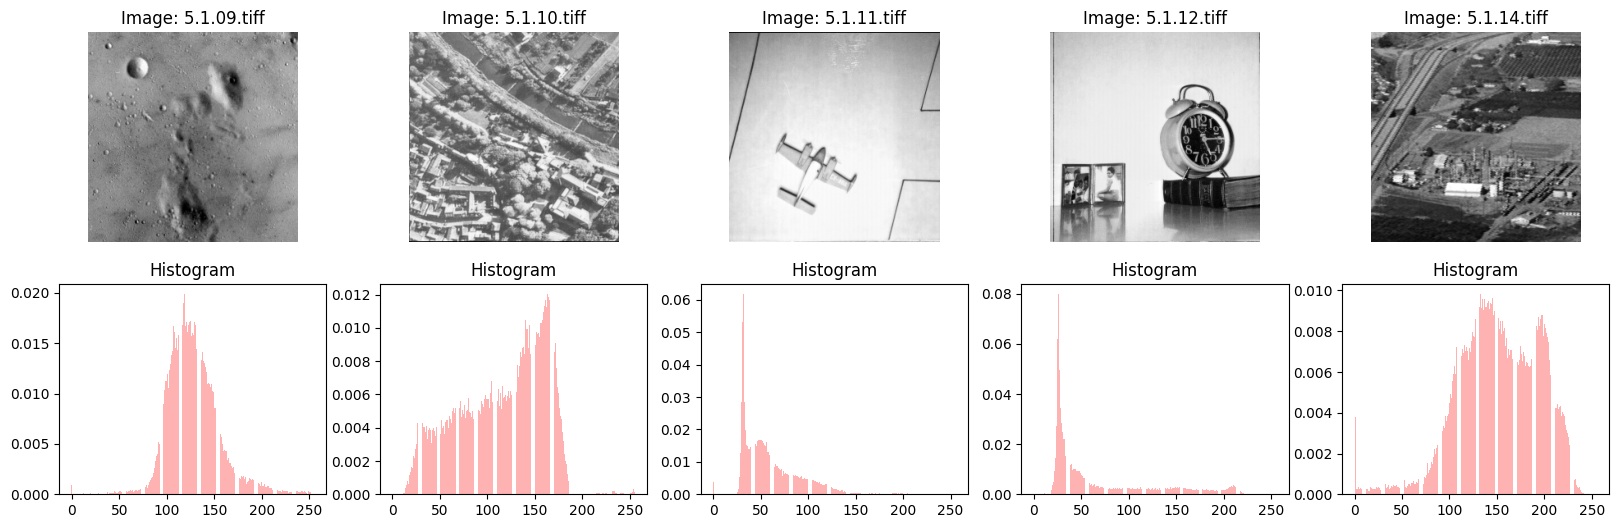

In [11]:
image_path_list = ["5.1.09.tiff", "5.1.10.tiff", "5.1.11.tiff", "5.1.12.tiff", "5.1.14.tiff"]

#Plotting image and its histogram pair
plt.figure(figsize=(4*len(image_path_list), 6))
for i, image_path in enumerate(image_path_list):
    image = plt.imread(image_path)
    plt.subplot(2, len(image_path_list), i+1)
    plt.imshow(image, cmap = 'gray')
    plt.axis('off')
    plt.title(f"Image: {image_path_list[i]}")
    
    histogram = normalized_histogram(image)
    plt.subplot(2, len(image_path_list), i+1+len(image_path_list))
    plt.bar(np.arange(256), histogram, color = 'r', alpha = 0.3)
    plt.title("Histogram")

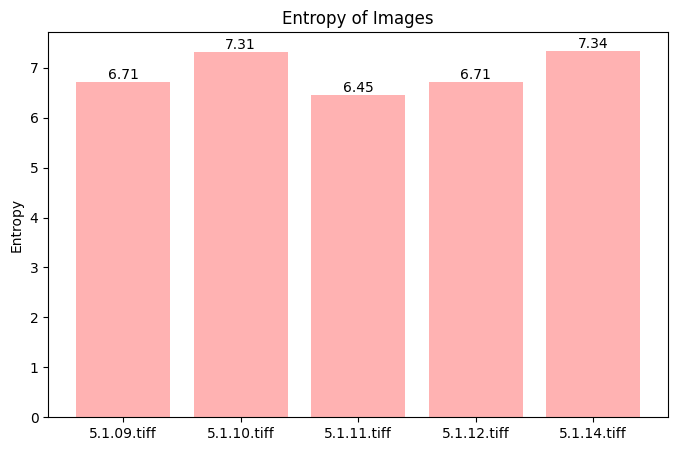

In [12]:
#Testing each of these images with the entropy function
image_path_list = ["5.1.09.tiff", "5.1.10.tiff", "5.1.11.tiff", "5.1.12.tiff", "5.1.14.tiff"]

entropy_list = []
for image_path in image_path_list:
    image = plt.imread(image_path)
    histogram = normalized_histogram(image)
    entropy_list.append(entropy(histogram))

plt.figure(figsize=(8,5))
for i in range(len(image_path_list)):
    plt.text(i, entropy_list[i], f"{entropy_list[i]:.2f}", ha = 'center', va = 'bottom')
plt.bar(image_path_list, entropy_list, color = 'r', alpha = 0.3)
plt.title("Entropy of Images")
plt.ylabel("Entropy")
plt.show()


Take a look at each of the 5 images considered. The image 5.1.11.tiff (Aeroplane) looks like it has the least distinct pixel intensitied and the histogram confirms the same. As the histogram plot is skewed towards certain values, it is expected to have the least entropy, which is the case as seen in the bar plot. The images 5.1.10.tiff and 5.1.14.tiff on the other hand seem to have the most distinct pixel intensities and hence, higher entropies.

In order for the entropy to be high, there should be multiple values that the distribution takes with respectable probability of occurence or lesser values with similar probabilities of occurence. If one compares 5.1.11.tiff and 5.1.12.tiff, it is clear that the latter takes more values and multiple of them occur with a similar probability apart from the fact that both are swayed towards a certain value (beginning of the plot). This means that the randomness is more in 5.1.12.tiff and the same can be confirmed through the bar plot.

Question 8:

Joint PMF and joint entropy: For this problem, work with the given stereo image pair labeled left.png and right.png respectively. As in the previous question, both images are gray scale. 

(a) Write a function that accepts this stereo image pair as input, and outputs the normalized joint histogram in addition to plotting it.

(b) Write a function that accepts the joint PMF of a pair of random variables as input and outputs the joint entropy. 

(c) Test your joint entropy function using the normalized joint histogram computed in Problem 8(a).

In [38]:
from PIL import Image
import numpy as np

def normalized_joint_histogram(image1, image2):
    """
    Computes the normalized joint histogram of two images
    """
    ##Test for grayscale image
    if len(image1.shape)!=2: #Gray scale image has only 2 dimensions - height and width 
        raise ValueError("Input image 1 is not grayscale")
    if(len(image2.shape)!=2):
        raise ValueError("Input image 2 is not grayscale")

    if(image1.shape != image2.shape):
        raise ValueError("Both images should have same dimensions")
    
    #Converting image from 0-1 range to 0-255 range
    image1 = np.round(image1*255).astype(np.uint8)
    image2 = np.round(image2*255).astype(np.uint8)
    
    ##Compute histogram
    height, width = image1.shape
    joint_histogram = np.zeros((256, 256))
    for i in range(height):
        for j in range(width):
            joint_histogram[image1[i,j], image2[i,j]] += 1
        
    ##Normalize histogram
    joint_histogram = joint_histogram/(height*width) #as number of pixels = height*width
    
    return joint_histogram

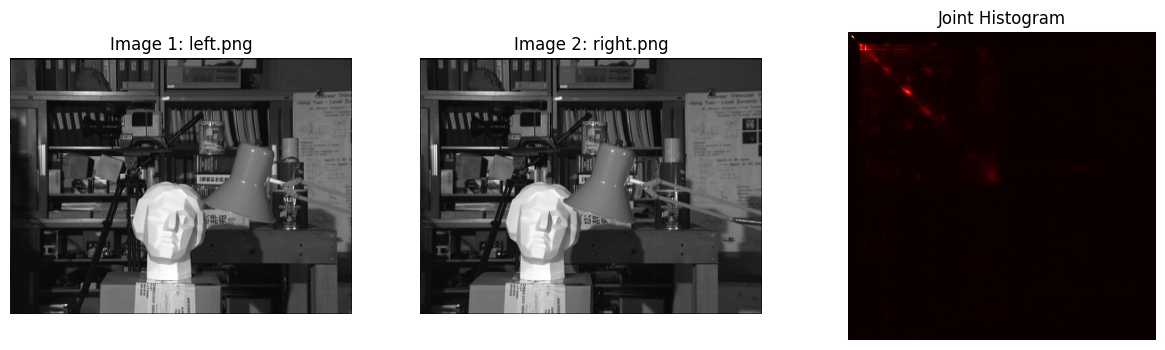

In [39]:
image_path_list = ["left.png", "right.png"]

plt.figure(figsize=(5*(len(image_path_list)+1), 4))
plt.subplot(1, len(image_path_list)+1, 1)
image1 = plt.imread(image_path_list[0])
plt.imshow(image1, cmap = 'gray')
plt.axis('off')
plt.title(f"Image 1: {image_path_list[0]}")

plt.subplot(1, len(image_path_list)+1, 2)
image2 = plt.imread(image_path_list[1])
plt.imshow(image2, cmap = 'gray')
plt.axis('off')
plt.title(f"Image 2: {image_path_list[1]}")

joint_histogram = normalized_joint_histogram(image1, image2)
plt.subplot(1, len(image_path_list)+1, 3)
plt.imshow(joint_histogram, cmap = 'hot')
plt.title("Joint Histogram")
plt.axis('off')
plt.show()


In [40]:
def joint_entropy(joint_pmf):
    """
    Computes the joint entropy of a discrete random variable with joint probability mass function joint_pmf
    H(X,Y) = -sum(p(x,y)log(p(x,y)))
    """
    if(np.sum(joint_pmf) - 1 > 1e-6): #Floating point error
        raise ValueError("The sum of the probabilities must be equal to 1")
    
    joint_entropy = 0
    for p in joint_pmf.flatten():
        if p > 0:
            joint_entropy -= p * np.log2(p)
    return joint_entropy

In [41]:
joint_entropy(joint_histogram)

13.675203263376206

Question 9

Conditional PMF and conditional entropy: Continue to work with the stereo image pair.

(a) Write a function that accepts as input the joint PMF of a pair of random variables, the index of the conditioning random variable, and the value of the conditioning random variable. The function must output the appropriate conditional PMF. 

(b) Write a function that accepts as input the joint PMF and the index of the conditioning RV, and outputs the conditional entropy. 

(c) Test your conditional entropy function using the normalized joint histogram computed in Problem 8 (a), for your choice of the conditioning RV. 

In [42]:
def conditional_pmf(joint_pmf, index_conditioning_rv, value_conditioning_rv):
    """
    Computes the conditional probability mass function of a discrete random variable with joint probability mass function joint_pmf
    index_conditioning_rv -> Index of the conditioning random variable
    value_conditioning_rv -> Value of the conditioning random variable
    """
    if(np.sum(joint_pmf) - 1 > 1e-6): #Floating point error
        raise ValueError("The sum of the probabilities must be equal to 1")
    
    if(index_conditioning_rv not in [0, 1]):
        raise ValueError("Index of the conditioning random variable should be either 0 or 1")
    
    if(value_conditioning_rv < 0 or value_conditioning_rv >= joint_pmf.shape[0]):
        raise ValueError("Value of the conditioning random variable is out of bounds")
    
    if(index_conditioning_rv == 0):
        conditional_pmf = joint_pmf[value_conditioning_rv, :]
    elif(index_conditioning_rv == 1):
        conditional_pmf = joint_pmf[:, value_conditioning_rv]
        
    if(np.sum(conditional_pmf) != 0):
        conditional_pmf = conditional_pmf/np.sum(conditional_pmf)
    
    return conditional_pmf

In [43]:
def conditional_entropy(joint_pmf, index_conditioning_rv):
    """
    Computes the conditional entropy of a discrete random variable with joint probability mass function joint_pmf
    index_conditioning_rv -> Index of the conditioning random variable
    """
    if(np.sum(joint_pmf) - 1 > 1e-6): #Floating point error
        raise ValueError("The sum of the probabilities must be equal to 1")
    
    if(index_conditioning_rv not in [0, 1]):
        raise ValueError("Index of the conditioning random variable should be either 0 or 1")
    
    #H(X|Y) = -sum(p(x,y)log(p(x|y))) = -sum(H(X|Y=y)p(y))
    #H(Y|X) = -sum(p(x,y)log(p(y|x))) = -sum(H(Y|X=x)p(x))
    
    if(index_conditioning_rv == 0):
        conditional_entropy = 0
        for i in range(joint_pmf.shape[0]):
            condition_pmf = conditional_pmf(joint_pmf, index_conditioning_rv, i)
            conditional_entropy += entropy(condition_pmf) * np.sum(joint_pmf[i, :])
    elif(index_conditioning_rv == 1):
        conditional_entropy = 0
        for i in range(joint_pmf.shape[1]):
            condition_pmf = conditional_pmf(joint_pmf, index_conditioning_rv, i)
            conditional_entropy += entropy(condition_pmf) * np.sum(joint_pmf[:, i])
    
    return conditional_entropy

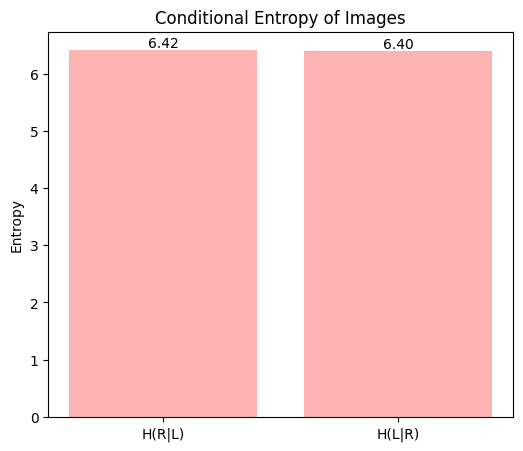

In [49]:
image_path_list = ["left.png", "right.png"]
image_context = ["H(R|L)", "H(L|R)"]

image1 = plt.imread(image_path_list[0])
image2 = plt.imread(image_path_list[1])

normalized_joint_histogram_rv = normalized_joint_histogram(image1, image2)

entropy_list = []
for i in range(2):
    entropy_list.append(conditional_entropy(normalized_joint_histogram_rv, i))

plt.figure(figsize=(3*len(image_path_list),5))
for i in range(len(image_path_list)):
    plt.text(i, entropy_list[i], f"{entropy_list[i]:.2f}", ha = 'center', va = 'bottom')
plt.bar(image_context, entropy_list, color = 'r', alpha = 0.3)
plt.title("Conditional Entropy of Images")
plt.ylabel("Entropy")
plt.show()

Question 10

KL divergence: We showed in class that for PMFs p and q defined on X , $D(p\|q) \ge 0, D(q\|p) \ne D(p\|q)$. This problem explores these properties experimentally.

(a) Write a function that accepts as input two PMFs $p$ and $q$ as input, and outputs $D(p\|q)$. 

(b) As discussed in class, let $p \sim$ Bern($r$) and $q \sim$ Bern($s$). For a fixed value of $r$, vary $s$ and do the following: 

i. Plot $D(p\|q), D(q\|p)$.

ii. Verify that $D(p\|q), D(q\|p)$ are indeed non-negative.

iii. Verify that $D(p\|q) \ne D(q\|p)$ and are both equal to zero only when $r = s$.

iv. Finally, find $D(p\|q)$ and $D(q\|p)$ where $p$ and $q$ are the normalized histograms of left.png and right.png respectively. Do you think $D(p\|q)$ is a good metric for image similarity? Print your response.

In [51]:
def KL_Divergence(p, q):
    """
    Computes the Kullback-Leibler Divergence between two probability mass functions p and q
    D_KL(p||q) = sum(p(x)log(p(x)/q(x)))
    """
    if(np.sum(p) - 1 > 1e-6 or np.sum(q) - 1 > 1e-6):
        raise ValueError("The sum of the probabilities must be equal to 1")
    if(len(p) != len(q)):
        raise ValueError("The length of the probability mass functions must be equal")
    
    KL_divergence = 0
    for i in range(len(p)):
        if p[i] > 0 and q[i] > 0:
            KL_divergence += p[i] * np.log2(p[i]/q[i])
        elif p[i] > 0 and q[i] == 0: #p*log(p/0) = infinity
            return np.inf
        elif p[i] == 0 and q[i] > 0:
            KL_divergence += 0 #0*log(0/q) = 0   
        elif p[i] == 0 and q[i] == 0:
            KL_divergence += 0 #0*log(0/0) = 0     
            
    return KL_divergence

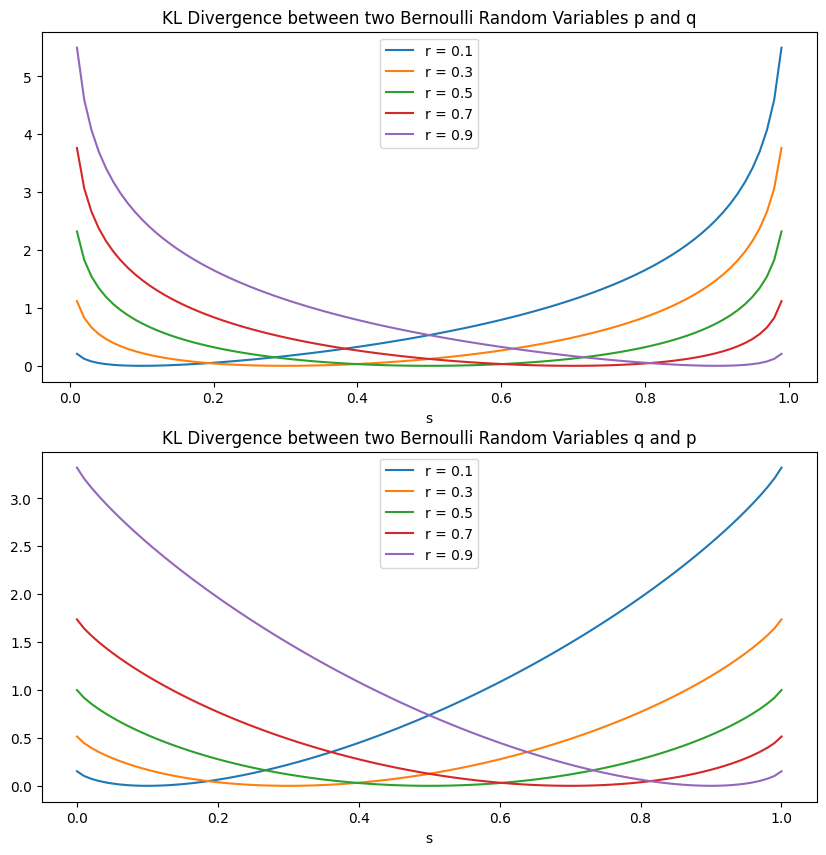

In [55]:
#p~Bern(r) and q~Bern(s) 
#Fix r and vary s; This is performed for different values of r
r_list = [0.1, 0.3, 0.5, 0.7, 0.9]
s_range = np.linspace(0, 1, 100)

KL_Divergence_pq_list = []
for r in r_list:
    KL_Divergence_temp = []
    for s in s_range:
        p = np.array([r, 1-r])
        q = np.array([s, 1-s])
        KL_Divergence_temp.append(KL_Divergence(p, q))
    KL_Divergence_pq_list.append(KL_Divergence_temp)

KL_Divergence_qp_list = []
for r in r_list:
    KL_Divergence_temp = []
    for s in s_range:
        p = np.array([r, 1-r])
        q = np.array([s, 1-s])
        KL_Divergence_temp.append(KL_Divergence(q, p))
    KL_Divergence_qp_list.append(KL_Divergence_temp)

    
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
for i in range(len(r_list)):
    plt.plot(s_range, KL_Divergence_pq_list[i], label = f"r = {r_list[i]}")
plt.title("KL Divergence between two Bernoulli Random Variables p and q") 
plt.xlabel("s")
plt.legend()

plt.subplot(2,1,2)
for i in range(len(r_list)):
    plt.plot(s_range, KL_Divergence_qp_list[i], label = f"r = {r_list[i]}")
plt.title("KL Divergence between two Bernoulli Random Variables q and p")
plt.xlabel("s")
plt.legend()

plt.show()

From the above plots, it can be seen that the value of KL Divergence is non-negative for all combinations of s and r in $[0,1]$. The same can be confirmed mathematically as well.

\begin{align*}
D(p\|q) &= \sum_{x \in \mathcal{X}} p(x)\log{p(x)\over q(x)} \\
&= \mathbb{E}_{p(x)} \left[ \log{p(x)\over q(x)} \right] \\
&= -\mathbb{E}_{p(x)} \left[ \log{q(x)\over p(x)} \right] \\
&\ge -\log \mathbb{E}_{p(x)}  \left[{q(x)\over p(x)} \right] \text{ using Jensen Inequality}\\
&= -\log  \sum_{x \in \mathcal{X}} p(x){q(x)\over p(x)} \\
&= -\log \sum_{x \in \mathcal{X}} q(x) \\
&= -\log 1 \\
&= 0
\end{align*}

A similar approach can be followed to prove the non-negativity for $D(q\|p)$ as well.

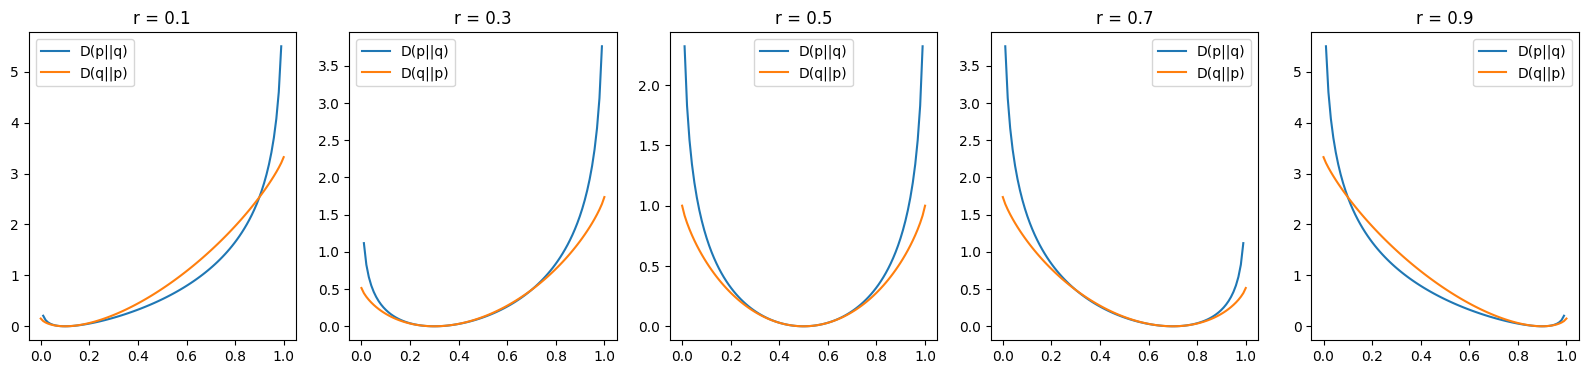

In [62]:
plt.figure(figsize=(4*len(r_list),4))
for i in range(len(r_list)):
    plt.subplot(1, len(r_list), i+1)
    plt.plot(s_range, KL_Divergence_pq_list[i], label = f"D(p||q)")
    plt.plot(s_range, KL_Divergence_qp_list[i], label = f"D(q||p)")
    plt.title(f"r = {r_list[i]}")
    plt.legend()
plt.show()
    

From the plots of $D(p\|q)$ and $D(q\|p)$, it is clear that the two don't match.

Additionally, one of the points of interaction of the two plots also intersects the X-axis and this intersection occurs when $r = s$. A simple way to confirm the same would be to see the shift in the intersection as one moves from the first plot to the last.

The same can be shown mathematically.

\begin{align*}
D(p\|q) - D(q\|p) &= \sum_{x \in \mathcal{X}} p(x)\log{p(x)\over q(x)}  - \sum_{x \in \mathcal{X}} q(x)\log{q(x)\over p(x)}\\
&= \left(r\log{r\over s} + (1-r)\log{{1-r}\over {1-s}}\right) - \left(s\log{s\over r} + (1-s)\log{{1-s}\over {1-r}}\right) \\
&= \left(r\log{r\over s} + (1-r)\log{{1-r}\over {1-s}}\right) + \left(s\log{r\over s} + (1-s)\log{{1-r}\over {1-s}}\right) \\
&= \left(r+s\right)\log{r\over s} + \left(2-r-s\right)\log {{1-r}\over {1-s}} \\
\end{align*}

This quantity is non-zero for almost all choices of $s$ and $r$ which means $D(p\|q) \ne D(q\|p)$ for the most part. If $r=s$, 
\begin{align*}
D(p\|q) - D(q\|p) &= \left(r+s\right)\log{r\over s} + \left(2-r-s\right)\log {{1-r}\over {1-s}} \\
&= \left(2r\right)\log{r\over r} + \left(2-2r\right)\log {{1-r}\over {1-r}} \\
&= 0 \\
\implies D(p\|q) &= D(q\|p)
\end{align*}


In [66]:
image_path_list = ["left.png", "right.png"]

p = normalized_histogram(plt.imread(image_path_list[0]))
q = normalized_histogram(plt.imread(image_path_list[1]))

KL_Divergence_pq = KL_Divergence(p, q)
KL_Divergence_qp = KL_Divergence(q, p)

print(f"KL Divergence between left and right images: D(p||q) = {KL_Divergence_pq}")
print(f"KL Divergence between left and right images: D(q||p) = {KL_Divergence_qp}")

KL Divergence between left and right images: D(p||q) = 0.015104015237387055
KL Divergence between left and right images: D(q||p) = 0.014409785833354494


The obtained values of KL Divergence are quite small. If one takes a look at the images, the images seem to be very similar as well. This shows that $D(p\|q)$ could be a good metric for image similarity. A smaller value of $D(p\|q)$ refers to a smaller "distance" between the two pmfs p and q implying similarity. At the same time, a larger value of  $D(p\|q)$ would mean a larger "distance" between the two pmfs and hence, imply disimilarity.